## Koopman von Neumann Method

Here we will use the Koopman von Neumann method to find the solution to the simple nonlinear ODE:

$\frac{\partial x}{\partial t} = -x^2,$ with $x(0)=1$

### Generate time evolution operator $U$ 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

# 10 qubits generates 1024 wavepoints
n_qubits = 10
n_grid = 2**n_qubits
grid_extent = (0, 2)
grid = np.linspace(*grid_extent, n_grid)
dx = grid[1] - grid[0]

X = np.diag(grid)

k = 2 * np.pi * np.fft.fftfreq(n_grid, d=dx)

# Momentum operator
def P(psi):
    psi_k = np.fft.fft(psi)  # Transform to momentum space
    p_psi_k = 1j * k * psi_k  # Apply the momentum operator in k-space
    p_psi = np.fft.ifft(p_psi_k)  # Transform back to position space
    return -1j*np.real(p_psi)

# Flow operator
def F(psi):
    return -X @ X @ psi

# Hamiltonian
def hamiltonian(psi):
    return 0.5*(P(F(psi)) + F(P(psi)))

def KvN_hamiltonian(x, psi, n):
    H = np.zeros((n, n), dtype=complex)

    for i in range(n):
        psi_i = np.zeros(n)
        psi_i[i] = 1
        H[:, i] = hamiltonian(psi_i)

    return H

# Initial state
psi = np.zeros(n_grid)
psi[n_grid//2] = 1

H = KvN_hamiltonian(grid, psi, n_grid)

#print(H)

# Exponentiate the Hamiltonian
delta = 0.01
U = la.expm(-1j * delta * H)


KeyboardInterrupt: 

### Time evolve the system

In [ ]:
# Time evolution
n_steps = 1000

# Initial state
psi = np.zeros(n_grid)
psi[n_grid//2] = 1

psi_store = np.zeros((n_grid, n_steps), dtype=complex)
for i in range(n_steps):
    psi = U @ psi
    psi_store[:, i] = psi


### Plotting

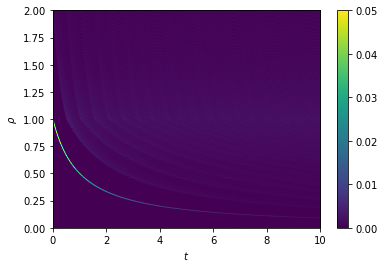

In [ ]:
# Plot the time evolution
rho_store = np.abs(psi_store)**2
rho_store = np.flipud(rho_store)

#rho_store = rho_store[n_grid//2:]

#rho_store = rho_store.transpose()
plt.imshow(rho_store, aspect='auto', extent=[0, n_steps*delta, *grid_extent], vmax=0.05)
plt.colorbar()
plt.xlabel('$t$')
plt.ylabel(r'$\rho $')
plt.savefig('plots/KvN_delta.pdf')
plt.show()


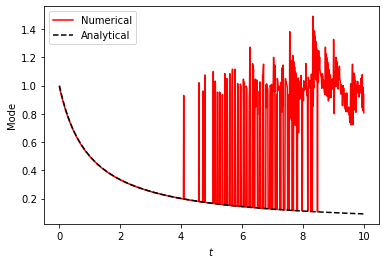

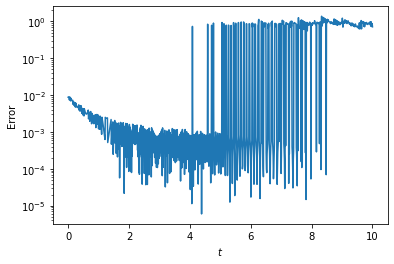

In [ ]:
# Calculate the mode
modes = np.zeros(n_steps)

def analytical(x0, t):
  return 1/(t+x0)

max_indices = np.argmax(rho_store, axis=0)

x = np.flipud(grid)

t = np.linspace(0, n_steps*delta, n_steps)

plt.plot(t, x[max_indices], label='Numerical', color='red')
plt.plot(t, analytical(1, t), label='Analytical', color='black', linestyle='dashed')
plt.xlabel('$t$')
plt.ylabel('Mode')
plt.legend()
plt.savefig('plots/KvN_mode.pdf')
plt.show()

# Error
error = np.abs(x[max_indices] - analytical(1, t))

plt.plot(t, error)
plt.xlabel('$t$')
plt.ylabel('Error')
plt.yscale('log')
plt.savefig('plots/KvN_error.pdf')
plt.show()


### Attempt 2: Wider initial distribution

4
1.0000000000000002


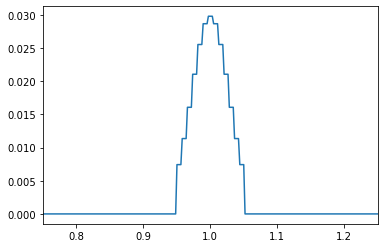

In [ ]:
import numpy as np

# Time evolution
n_steps = 3000

# Initial state
bins = 13
center = 1
spread = 0.1
psi = np.zeros(n_grid)

# Get indices of the bins
indices = np.where((center - spread/2 <= grid) & (grid <= center + spread/2) )
bin_interval = len(indices[0])//bins
print(bin_interval)

def gaussian(x, mu=0, sig=0.25):
    return 1.0 / (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.0) / 2)

# Calculate bin centers
bin_centers = np.linspace(center - spread/2, center + spread/2, bins)

# Evaluate the Gaussian function at each bin center
bin_values = gaussian(bin_centers, 1, 0.03)

# Extend the bin values
extended_bin_values = np.repeat(bin_values, bin_interval)

# Normalize the bin values
extended_bin_values /= sum(extended_bin_values)
print(sum(extended_bin_values))

# Assign the bin values to the initial state
psi[indices] = extended_bin_values

plt.plot(grid, psi)
plt.xlim((0.75,1.25))
plt.savefig('plots/KvN_initial.pdf')
plt.show()

psi_store = np.zeros((n_grid, n_steps), dtype=complex)
for i in range(n_steps):
    psi = U @ psi
    psi_store[:, i] = psi

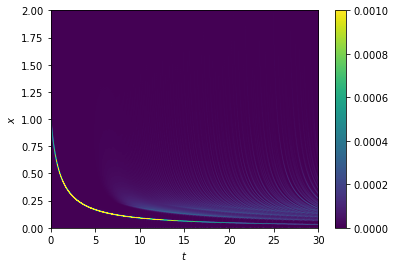

In [ ]:
# Plot the time evolution
rho_store = np.abs(psi_store)**2
rho_store = np.flipud(rho_store)

#rho_store = rho_store[n_grid//2:]

#rho_store = rho_store.transpose()
plt.imshow(rho_store, aspect='auto', extent=[0, n_steps*delta, *grid_extent], vmax=0.001)
plt.colorbar()
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.savefig('plots/KvN_gaussian.pdf')
plt.show()

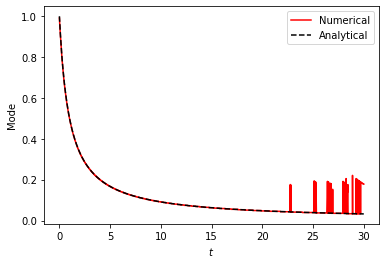

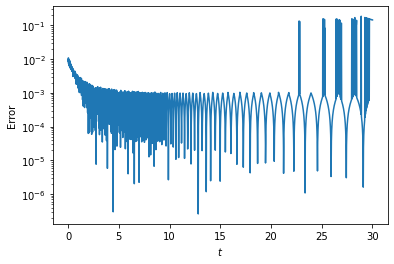

In [ ]:
# Calculate the mode
modes = np.zeros(n_steps)

def analytical(x0, t):
  return 1/(t+x0)

max_indices = np.argmax(rho_store, axis=0)

x = np.flipud(grid)

t = np.linspace(0, n_steps*delta, n_steps)

plt.plot(t, x[max_indices], label='Numerical', color='red')
plt.plot(t, analytical(1, t), label='Analytical', color='black', linestyle='dashed')
plt.xlabel('$t$')
plt.ylabel('Mode')
plt.legend()
plt.savefig('plots/KvN_gaussian_mode.pdf')
plt.show()

# Error
error = np.abs(x[max_indices] - analytical(1, t))

plt.plot(t, error)
plt.xlabel('$t$')
plt.ylabel('Error')
plt.yscale('log')
plt.savefig('plots/KvN_gaussian_error.pdf')
plt.show()

### Trying something new

This time solving :

$\frac{\partial x}{\partial t} = -x^3,$ with $x(0)=1$

In [ ]:
# Flow operator
def F(psi):
    return -X @ X @ X @ psi

# Hamiltonian
def hamiltonian(psi):
    return 0.5*(P(F(psi)) + F(P(psi)))

def KvN_hamiltonian(x, psi, n):
    H = np.zeros((n, n), dtype=complex)

    for i in range(n):
        psi_i = np.zeros(n)
        psi_i[i] = 1
        H[:, i] = hamiltonian(psi_i)

    return H

# Initial state
psi = np.zeros(n_grid)
psi[n_grid//2] = 1

H = KvN_hamiltonian(grid, psi, n_grid)

#print(H)

# Exponentiate the Hamiltonian
delta = 0.01
U = la.expm(-1j * delta * H)


KeyboardInterrupt: 

In [ ]:
# Time evolution
n_steps = 1000

# Initial state
psi = np.zeros(n_grid)
psi[n_grid//2] = 1

psi_store = np.zeros((n_grid, n_steps), dtype=complex)
for i in range(n_steps):
    psi = U @ psi
    psi_store[:, i] = psi


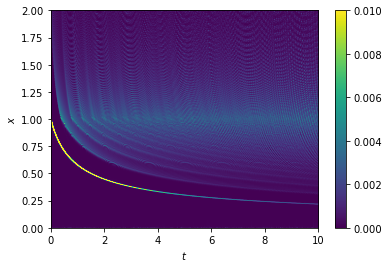

In [ ]:
# Plot the time evolution
rho_store = np.abs(psi_store)**2
rho_store = np.flipud(rho_store)

#rho_store = rho_store[n_grid//2:]

#rho_store = rho_store.transpose()
plt.imshow(rho_store, aspect='auto', extent=[0, n_steps*delta, *grid_extent], vmax=0.01)
plt.colorbar()
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.show()

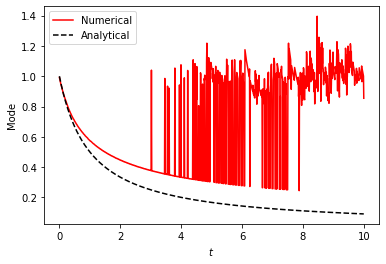

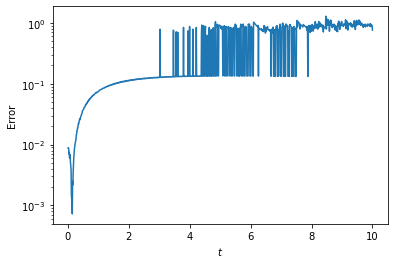

In [ ]:
# Calculate the mode
modes = np.zeros(n_steps)

def analytical(x0, t):
  return 1/(t+x0)

max_indices = np.argmax(rho_store, axis=0)

x = np.flipud(grid)

t = np.linspace(0, n_steps*delta, n_steps)

plt.plot(t, x[max_indices], label='Numerical', color='red')
plt.plot(t, analytical(1, t), label='Analytical', color='black', linestyle='dashed')
plt.xlabel('$t$')
plt.ylabel('Mode')
plt.legend()
plt.show()

# Error
error = np.abs(x[max_indices] - analytical(1, t))

plt.plot(t, error)
plt.xlabel('$t$')
plt.ylabel('Error')
plt.yscale('log')
plt.show()

4
1.0000000000000002


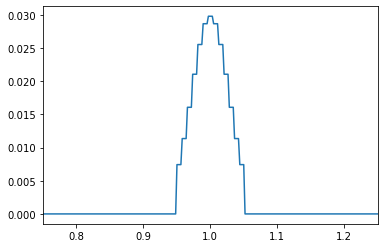

In [ ]:
import numpy as np

# Time evolution
n_steps = 3000

# Initial state
bins = 13
center = 1
spread = 0.1
psi = np.zeros(n_grid)

# Get indices of the bins
indices = np.where((center - spread/2 <= grid) & (grid <= center + spread/2) )
bin_interval = len(indices[0])//bins
print(bin_interval)

def gaussian(x, mu=0, sig=0.25):
    return 1.0 / (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.0) / 2)

# Calculate bin centers
bin_centers = np.linspace(center - spread/2, center + spread/2, bins)

# Evaluate the Gaussian function at each bin center
bin_values = gaussian(bin_centers, 1, 0.03)

# Extend the bin values
extended_bin_values = np.repeat(bin_values, bin_interval)

# Normalize the bin values
extended_bin_values /= sum(extended_bin_values)
print(sum(extended_bin_values))

# Assign the bin values to the initial state
psi[indices] = extended_bin_values

plt.plot(grid, psi)
plt.xlim((0.75,1.25))

psi_store = np.zeros((n_grid, n_steps), dtype=complex)
for i in range(n_steps):
    psi = U @ psi
    psi_store[:, i] = psi

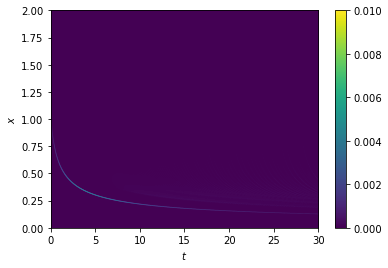

In [ ]:
# Plot the time evolution
rho_store = np.abs(psi_store)**2
rho_store = np.flipud(rho_store)

#rho_store = rho_store[n_grid//2:]

#rho_store = rho_store.transpose()
plt.imshow(rho_store, aspect='auto', extent=[0, n_steps*delta, *grid_extent], vmax=0.01)
plt.colorbar()
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.show()

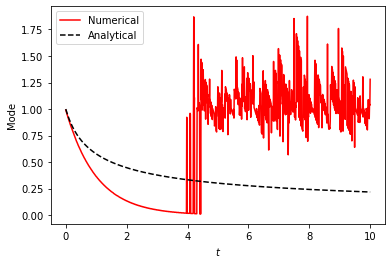

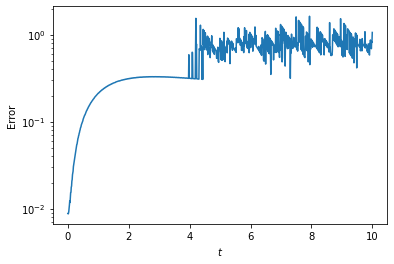

In [ ]:
# Calculate the mode
modes = np.zeros(n_steps)

def analytical(x0, t):
  return x0/np.sqrt(1+2*x0**2 *t)

max_indices = np.argmax(rho_store, axis=0)

x = np.flipud(grid)

t = np.linspace(0, n_steps*delta, n_steps)

plt.plot(t, x[max_indices], label='Numerical', color='red')
plt.plot(t, analytical(1, t), label='Analytical', color='black', linestyle='dashed')
plt.xlabel('$t$')
plt.ylabel('Mode')
plt.legend()
plt.show()

# Error
error = np.abs(x[max_indices] - analytical(1, t))

plt.plot(t, error)
plt.xlabel('$t$')
plt.ylabel('Error')
plt.yscale('log')
plt.show()

### Quadratic Polynomial test case

Here I will test the case of 

$\frac{dx}{dt} = ax^2 +bx +c$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

a = 0
b = -1
c = 0

# 10 qubits generates 1024 wavepoints
n_qubits = 10
n_grid = 2**n_qubits
grid_extent = (0, 2)
grid = np.linspace(*grid_extent, n_grid)
dx = grid[1] - grid[0]

X = np.diag(grid)

k = 2 * np.pi * np.fft.fftfreq(n_grid, d=dx)

# Momentum operator
def P(psi):
    psi_k = np.fft.fft(psi)  # Transform to momentum space
    p_psi_k = 1j * k * psi_k  # Apply the momentum operator in k-space
    p_psi = np.fft.ifft(p_psi_k)  # Transform back to position space
    return -1j*np.real(p_psi)

# Flow operator
def F(psi):
    return a*X @ X @ psi + b*X @ psi + c*psi

# Hamiltonian
def hamiltonian(psi):
    return 0.5*(P(F(psi)) + F(P(psi)))

def KvN_hamiltonian(x, psi, n):
    H = np.zeros((n, n), dtype=complex)

    for i in range(n):
        psi_i = np.zeros(n)
        psi_i[i] = 1
        H[:, i] = hamiltonian(psi_i)

    return H

# Initial state
psi = np.zeros(n_grid)
psi[n_grid//2] = 1

H = KvN_hamiltonian(grid, psi, n_grid)

#print(H)

# Exponentiate the Hamiltonian
delta = 0.01
U = la.expm(-1j * delta * H)

In [ ]:
# Time evolution
n_steps = 1000

# Initial state
psi = np.zeros(n_grid)
psi[n_grid//2] = 1

psi_store = np.zeros((n_grid, n_steps), dtype=complex)
for i in range(n_steps):
    psi = U @ psi
    psi_store[:, i] = psi


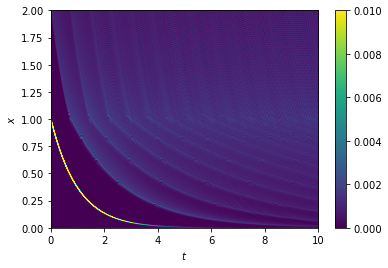

In [ ]:
# Plot the time evolution
rho_store = np.abs(psi_store)**2
rho_store = np.flipud(rho_store)

#rho_store = rho_store[n_grid//2:]

#rho_store = rho_store.transpose()
plt.imshow(rho_store, aspect='auto', extent=[0, n_steps*delta, *grid_extent], vmax=0.01)
plt.colorbar()
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.show()

Initializing the state
Generating the Hamiltonian


100%|██████████| 256/256 [00:00<00:00, 266.90it/s]


Exponetiating the Hamiltonian
Time evolution


100%|██████████| 999/999 [00:00<00:00, 16807.16it/s]


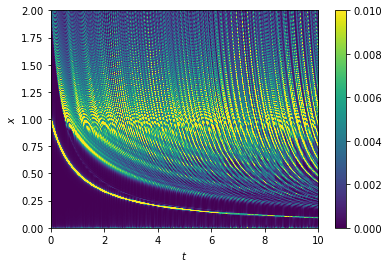

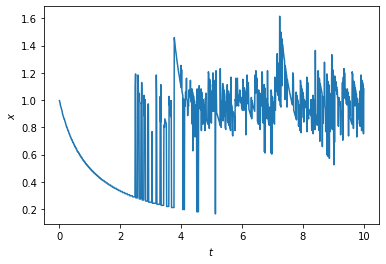

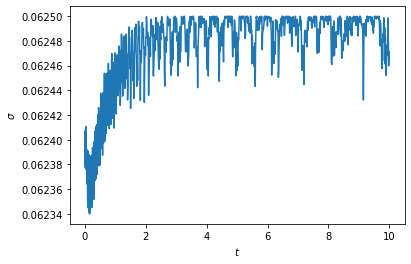

In [1]:
import KvN_tools as tools
import numpy as np

n_qubits = 8
n_grid = 2**n_qubits
grid_extent = (0, 2)

delta = 0.01
n_steps = 1000

x = np.linspace(*grid_extent, n_grid)
t = np.linspace(0, delta*n_steps, n_steps)

psi = tools.psi0(x, 1)

params = (-1,0,0)

H = tools.KvN_hamiltonian(x, params)

psi_store = tools.time_evolution(H, psi, delta, n_steps)

tools.plot_evolution(x, psi_store, t)
tools.plot_mode(x, psi_store, t)
tools.plot_std(x, psi_store, t)

Initializing the state
0.9999999999999997
